In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
training_set=pd.read_csv('/content/drive/MyDrive/deep_learning_dataset/google_stock/google_train.csv')
training_set



,Date,Open,High,Low,Close,Adj Close,Volume
0,1/4/2016,743.000000,744.059998,731.257996,741.840027,741.840027,3272800
1,1/5/2016,746.450012,752.000000,738.640015,742.580017,742.580017,1950700
2,1/6/2016,730.000000,747.179993,728.919983,743.619995,743.619995,1947000
3,1/7/2016,730.309998,738.500000,719.059998,726.390015,726.390015,2963700
4,1/8/2016,731.450012,733.229980,713.000000,714.469971,714.469971,2450900
...,...,...,...,...,...,...,...
1254,12/24/2020,1735.000000,1746.000000,1729.109985,1738.849976,1738.849976,346800
1255,12/28/2020,1751.635010,1790.728027,1746.334961,1776.089966,1776.089966,1393000
1256,12/29/2020,1787.790039,1792.439941,1756.089966,1758.719971,1758.719971,1299400
1257,12/30/2020,1762.010010,1765.094971,1725.599976,1739.520020,1739.520020,1306100


In [ ]:
training_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1259 non-null   object 
 1   Open       1259 non-null   float64
 2   High       1259 non-null   float64
 3   Low        1259 non-null   float64
 4   Close      1259 non-null   float64
 5   Adj Close  1259 non-null   float64
 6   Volume     1259 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 69.0+ KB


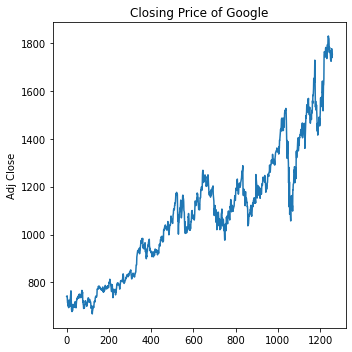

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5, 5))
plt.subplots_adjust(top=1.25, bottom=1.2)
training_set['Adj Close'].plot()
plt.ylabel('Adj Close')
plt.xlabel(None)
plt.title(f"Closing Price of Google")
plt.tight_layout()

Text(0.5, 1.0, 'Sales Volume')

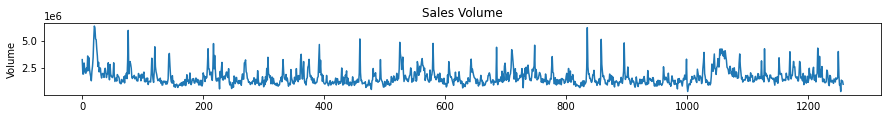

In [ ]:
# Now let's plot the total volume of stock being traded each day
plt.figure(figsize=(15, 20))
plt.subplots_adjust(top=1.25, bottom=1.2)
training_set['Volume'].plot()
plt.ylabel('Volume')
plt.xlabel(None)
plt.title(f"Sales Volume")

In [ ]:
training_set=training_set.iloc[:,1:2].values

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc= MinMaxScaler()
training_set=sc.fit_transform(training_set)

X_train= training_set[0:1257]
y_train= training_set[1:1258]

X_train=np.reshape(X_train, (1257 , 1 , 1))

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [ ]:
regressor = Sequential()

regressor.add(LSTM(units=4, activation= 'sigmoid', input_shape= (None,1)))

regressor.add(Dense( units=1 ))

regressor.compile(optimizer='adam', loss='mean_squared_error')
regressor.fit(X_train, y_train, batch_size=32, epochs=200)

Epoch 1/200
40/40 [==============================] - 1s 2ms/step - loss: 0.0698
Epoch 2/200
40/40 [==============================] - 0s 1ms/step - loss: 0.0547
Epoch 3/200
40/40 [==============================] - 0s 1ms/step - loss: 0.0499
Epoch 4/200
40/40 [==============================] - 0s 2ms/step - loss: 0.0480
Epoch 5/200
40/40 [==============================] - 0s 2ms/step - loss: 0.0467
Epoch 6/200
40/40 [==============================] - 0s 2ms/step - loss: 0.0455
Epoch 7/200
40/40 [==============================] - 0s 2ms/step - loss: 0.0442
Epoch 8/200
40/40 [==============================] - 0s 2ms/step - loss: 0.0430
Epoch 9/200
40/40 [==============================] - 0s 1ms/step - loss: 0.0419
Epoch 10/200
40/40 [==============================] - 0s 2ms/step - loss: 0.0407
Epoch 11/200
40/40 [==============================] - 0s 1ms/step - loss: 0.0396
Epoch 12/200
40/40 [==============================] - 0s 2ms/step - loss: 0.0385
Epoch 13/200
40/40 [=================

In [ ]:
test_set = pd.read_csv('/content/drive/MyDrive/deep_learning_dataset/google_stock/google_test.csv')
real_stock_price = test_set.iloc[:,1:2].values

inputs = real_stock_price
inputs = sc.transform(inputs)
inputs = np.reshape(inputs, (20 , 1, 1))
predicted_stock_price = regressor.predict(inputs)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

1/1 [==============================] - 0s 141ms/step


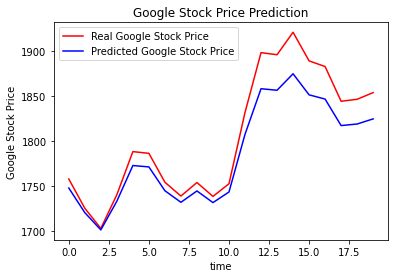

In [ ]:
plt.plot( real_stock_price , color = 'red' , label = 'Real Google Stock Price')
plt.plot( predicted_stock_price , color = 'blue' , label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel( 'time' )
plt.ylabel( 'Google Stock Price' )
plt.legend()
plt.show()